# LSTM Example Using Flights Dataset from Seaborn

In this notebook, we will be using a Vanilla RNN and a LSTM to predict the patterns seen in the number of flight passengers each month since 1949. We will then visually compare the performance of these prediction models.

### Import Necessary Packages

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


### Some Exploratory Data Analysis

Here we take a look at the format the data comes in, and the pattern that we are trying to predict.

In [2]:
flight_df = sns.load_dataset("flights")

In [3]:
flight_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


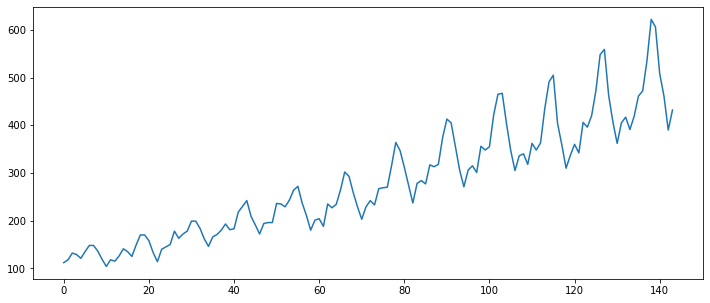

In [4]:
plt.figure(figsize=[12., 5.])
flight_df['passengers'].plot(kind='line');

### Preprocess the data

Here we convert integer amount of passengers into floats for better computations. Also, we split the original training and validation datasets. Then, we try to scale the data for some normalization for more stable processing in the neuro netwoks.

In [5]:
# Convert passenter data to float32 for better processing
flight_df['passengers'] = flight_df['passengers'].astype(np.float32)

# Reserve last 12 months as test set:
train_data = flight_df['passengers'][:-12]
valid_data = flight_df['passengers'][-12:]

# scale data for better training and more stability
train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
valid_data = (valid_data - train_mean) / train_std

In [6]:
# We use each datapoint to predict the next one, so x will be one datapoint and y will be the next
# However, we can train the model differently so that we use more datapoints in each X
train_gen = TimeseriesGenerator(train_data, train_data, length=1, sampling_rate=1, batch_size=1)

In [7]:
train_X = []
train_y = []
for i in range(0, len(train_gen)):
    x, y = train_gen[i]
    train_X.append(np.array(x))
    train_y.append(y[0])

In [8]:
train_X = np.array(train_X)
train_y = np.array(train_y)

### Model setup

In [50]:
lstm_model = Sequential()
lstm_model.add(LSTM(108, input_shape=(1, 1)))
lstm_model.add(Dense(1))

In [51]:
lstm_model.compile(
    optimizer='SGD', loss="MSE",  metrics=['accuracy']
)

In [52]:
# Reshape the input data to fit the network
train_X = train_X.reshape(131, 1, 1)

In [53]:
history = lstm_model.fit(train_X, train_y, batch_size = 5, epochs = 50)

Epoch 1/50
131/131 [==============================] - 1s 8ms/step - loss: 0.9450 - accuracy: 0.0000e+00
Epoch 2/50
131/131 [==============================] - 0s 824us/step - loss: 0.8104 - accuracy: 0.0000e+00
Epoch 3/50
131/131 [==============================] - 0s 794us/step - loss: 0.6922 - accuracy: 0.0000e+00
Epoch 4/50
131/131 [==============================] - 0s 792us/step - loss: 0.5850 - accuracy: 0.0000e+00
Epoch 5/50
131/131 [==============================] - 0s 764us/step - loss: 0.4865 - accuracy: 0.0000e+00
Epoch 6/50
131/131 [==============================] - 0s 743us/step - loss: 0.4014 - accuracy: 0.0000e+00
Epoch 7/50
131/131 [==============================] - 0s 742us/step - loss: 0.3284 - accuracy: 0.0000e+00
Epoch 8/50
131/131 [==============================] - 0s 748us/step - loss: 0.2661 - accuracy: 0.0000e+00
Epoch 9/50
131/131 [==============================] - 0s 746us/step - loss: 0.2173 - accuracy: 0.0000e+00
Epoch 10/50
131/131 [===========================

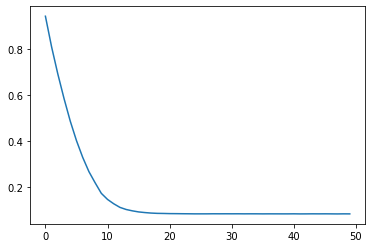

In [54]:
plt.plot(history.history['loss'])

In [55]:
# Get a prediction on the training data
train_y_pred = lstm_model.predict(train_X)
temp = []

for i in range(0, len(train_y_pred)):
    temp.append(train_y_pred[i][0])
    
train_y_pred = temp

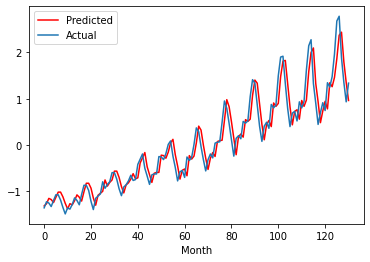

In [61]:
# Plot predicted training data vs. actual training data

plt.xlabel("Month")

plt.plot(train_y_pred, color = "red")
plt.plot(train_y)

plt.legend(["Predicted", "Actual"], loc ="upper left");

### Same process for Simple RNN

In [18]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(108, input_shape=(1, 1)))
rnn_model.add(Dense(1))

In [19]:
rnn_model.compile(
    optimizer='SGD', loss="MSE",  metrics=['accuracy']
)

In [20]:
history = rnn_model.fit(train_X, train_y, batch_size = 5, epochs = 200)

Epoch 1/200
131/131 [==============================] - 1s 5ms/step - loss: 0.4823 - accuracy: 0.0000e+00
Epoch 2/200
131/131 [==============================] - 0s 341us/step - loss: 0.0916 - accuracy: 0.0000e+00
Epoch 3/200
131/131 [==============================] - 0s 339us/step - loss: 0.0840 - accuracy: 0.0000e+00
Epoch 4/200
131/131 [==============================] - 0s 332us/step - loss: 0.0840 - accuracy: 0.0000e+00
Epoch 5/200
131/131 [==============================] - 0s 342us/step - loss: 0.0837 - accuracy: 0.0000e+00
Epoch 6/200
131/131 [==============================] - 0s 336us/step - loss: 0.0840 - accuracy: 0.0000e+00
Epoch 7/200
131/131 [==============================] - 0s 344us/step - loss: 0.0842 - accuracy: 0.0000e+00
Epoch 8/200
131/131 [==============================] - 0s 334us/step - loss: 0.0838 - accuracy: 0.0000e+00
Epoch 9/200
131/131 [==============================] - 0s 333us/step - loss: 0.0854 - accuracy: 0.0000e+00
Epoch 10/200
131/131 [=================

Epoch 77/200
131/131 [==============================] - 0s 355us/step - loss: 0.0846 - accuracy: 0.0000e+00
Epoch 78/200
131/131 [==============================] - 0s 374us/step - loss: 0.0837 - accuracy: 0.0000e+00
Epoch 79/200
131/131 [==============================] - 0s 349us/step - loss: 0.0838 - accuracy: 0.0000e+00
Epoch 80/200
131/131 [==============================] - 0s 345us/step - loss: 0.0828 - accuracy: 0.0000e+00
Epoch 81/200
131/131 [==============================] - 0s 353us/step - loss: 0.0836 - accuracy: 0.0000e+00
Epoch 82/200
131/131 [==============================] - 0s 366us/step - loss: 0.0824 - accuracy: 0.0000e+00
Epoch 83/200
131/131 [==============================] - 0s 354us/step - loss: 0.0836 - accuracy: 0.0000e+00
Epoch 84/200
131/131 [==============================] - 0s 362us/step - loss: 0.0842 - accuracy: 0.0000e+00
Epoch 85/200
131/131 [==============================] - 0s 390us/step - loss: 0.0830 - accuracy: 0.0000e+00
Epoch 86/200
131/131 [======

131/131 [==============================] - 0s 390us/step - loss: 0.0823 - accuracy: 0.0000e+00
Epoch 153/200
131/131 [==============================] - 0s 351us/step - loss: 0.0823 - accuracy: 0.0000e+00
Epoch 154/200
131/131 [==============================] - 0s 342us/step - loss: 0.0827 - accuracy: 0.0000e+00
Epoch 155/200
131/131 [==============================] - 0s 457us/step - loss: 0.0824 - accuracy: 0.0000e+00
Epoch 156/200
131/131 [==============================] - 0s 521us/step - loss: 0.0825 - accuracy: 0.0000e+00
Epoch 157/200
131/131 [==============================] - 0s 496us/step - loss: 0.0818 - accuracy: 0.0000e+00
Epoch 158/200
131/131 [==============================] - 0s 495us/step - loss: 0.0830 - accuracy: 0.0000e+00
Epoch 159/200
131/131 [==============================] - 0s 473us/step - loss: 0.0822 - accuracy: 0.0000e+00
Epoch 160/200
131/131 [==============================] - 0s 471us/step - loss: 0.0831 - accuracy: 0.0000e+00
Epoch 161/200
131/131 [==========

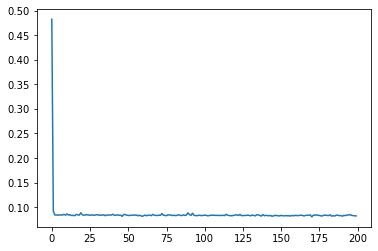

In [21]:
plt.plot(history.history['loss'])

In [22]:
train_y_pred_rnn = rnn_model.predict(train_X)
temp = []

for i in range(0, len(train_y_pred_rnn)):
    temp.append(train_y_pred_rnn[i][0])
    
train_y_pred_rnn = temp

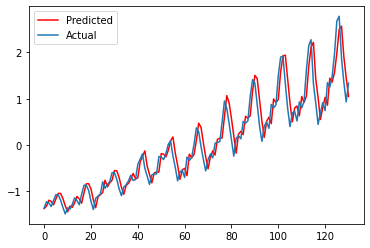

In [63]:
plt.plot(train_y_pred_rnn, color = "red")
plt.plot(train_y)
plt.legend(["Predicted", "Actual"], loc ="upper left");

#### Here we re-combine the datasets to see the performance on data that has not been trained on.

In [24]:
data = pd.concat([train_data, valid_data])

In [32]:
gen = TimeseriesGenerator(data, data, length=1, sampling_rate=1, batch_size=1)

In [33]:
X = []
Y = []
for i in range(0, len(gen)):
    x, y = gen[i]
    X.append(np.array(x))
    Y.append(y[0])

In [34]:
X = np.array(X)
Y = np.array(Y)

In [36]:
X = X.reshape(143, 1, 1)

In [37]:
y_pred_rnn = rnn_model.predict(X)
temp = []

for i in range(0, len(y_pred_rnn)):
    temp.append(y_pred_rnn[i][0])
    
y_pred_rnn = temp

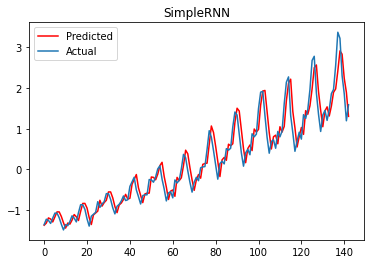

In [67]:
plt.plot(y_pred_rnn, color = "red")
plt.plot(Y)
plt.title("SimpleRNN")
plt.legend(["Predicted", "Actual"], loc ="upper left");

In [39]:
y_pred_lstm = lstm_model.predict(X)
temp = []

for i in range(0, len(y_pred_lstm)):
    temp.append(y_pred_lstm[i][0])
    
y_pred_lstm = temp

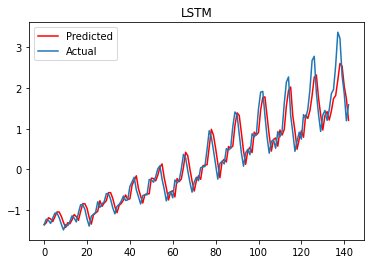

In [66]:
plt.plot(y_pred_lstm, color = "red")
plt.plot(Y)
plt.title("LSTM")
plt.legend(["Predicted", "Actual"], loc ="upper left");